# Project 1 / SAT Scores

## Step 1: Open the `sat_scores.csv` file and investigate the data


#### 1. What does the data describe?

The data describes the SAT scores by state. The other variables are the Participation Rate and the SAT Math and Verbal scores.

#### 2. Does the data look complete? Are there any obvious issues with the observations?

The data looks complete at first glance. There are no missing values, but there is an additional value called 'All' which sums all the data from the columns.

## Step 2: Load the data.

In [1]:
# Import Packages
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


#### 3. Load the data into a list of lists

In [2]:
# Open file
file_loc = 'data/sat_scores.csv'
with open(file_loc, 'r') as f:
    lines = f.readlines()

In [3]:
# Replace '\n' and ''
cleaned_data = []
for line in lines:
    cleaned_data.append(line.replace('\n',''))

In [4]:
# Split the data strings on commas
split_data = []
for datum in cleaned_data:
    split_data.append(datum.split(','))

#### 4. Print the data

In [5]:
print split_data

[['State', 'Rate', 'Verbal', 'Math'], ['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13', '562', '553'], ['NM', '13', '551', '542'], ['IL', '12', '576', '589'], ['KY', '12

#### 5. Extract a list of the labels from the data, and remove them from the data.

In [6]:
# create labels and data variables
labels = split_data[0]
data = split_data[1:]

print labels
print ''
print data

['State', 'Rate', 'Verbal', 'Math']

[['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13', '562', '553'], ['NM', '13', '551', '542'], ['IL', '12', '576', '589'], ['KY', '12

#### 6. Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)

In [7]:
states = []
for row in data:
    states.append(row[0:1])
    
print states

[['CT'], ['NJ'], ['MA'], ['NY'], ['NH'], ['RI'], ['PA'], ['VT'], ['ME'], ['VA'], ['DE'], ['MD'], ['NC'], ['GA'], ['IN'], ['SC'], ['DC'], ['OR'], ['FL'], ['WA'], ['TX'], ['HI'], ['AK'], ['CA'], ['AZ'], ['NV'], ['CO'], ['OH'], ['MT'], ['WV'], ['ID'], ['TN'], ['NM'], ['IL'], ['KY'], ['WY'], ['MI'], ['MN'], ['KS'], ['AL'], ['NE'], ['OK'], ['MO'], ['LA'], ['WI'], ['AR'], ['UT'], ['IA'], ['SD'], ['ND'], ['MS'], ['All']]


#### 7. Print the types of each column

In [8]:
print(type(data))
print(type(states))

<type 'list'>
<type 'list'>


#### 8. Do any types need to be reassigned? If so, go ahead and do it.

In [9]:
rate = labels.index('Rate')
math = labels.index('Math')
verbal = labels.index('Verbal')

for row in data:
    row[rate] = int(row[rate])
    row[math] = int(row[math])
    row[verbal] = int(row[verbal])
[type(item) for item in data[0]]

[str, int, int, int]

#### 9. Create a dictionary for each column mapping the State to its respective value for that column. 

In [10]:
state_dictionary = {}
for state_entries in data:
    # create new list for just scores
    list_scores = []
    for index, element in enumerate(state_entries):
        # index 0 refers to the states, so the for loop will pass
        if index == 0:
            pass
        else:
            list_scores.append(element)
    # create state dictionary        
    state_dictionary[state_entries[0]] = list_scores 
      
print state_dictionary

{'WA': [53, 527, 527], 'DE': [67, 501, 499], 'DC': [56, 482, 474], 'WI': [6, 584, 596], 'WV': [18, 527, 512], 'HI': [52, 485, 515], 'FL': [54, 498, 499], 'WY': [11, 547, 545], 'NH': [72, 520, 516], 'NJ': [81, 499, 513], 'NM': [13, 551, 542], 'TX': [53, 493, 499], 'LA': [7, 564, 562], 'NC': [65, 493, 499], 'ND': [4, 592, 599], 'NE': [8, 562, 568], 'TN': [13, 562, 553], 'NY': [77, 495, 505], 'PA': [71, 500, 499], 'RI': [71, 501, 499], 'NV': [33, 509, 515], 'VA': [68, 510, 501], 'CO': [31, 539, 542], 'AK': [51, 514, 510], 'AL': [9, 559, 554], 'AR': [6, 562, 550], 'VT': [69, 511, 506], 'IL': [12, 576, 589], 'GA': [63, 491, 489], 'IN': [60, 499, 501], 'IA': [5, 593, 603], 'OK': [8, 567, 561], 'AZ': [34, 523, 525], 'CA': [51, 498, 517], 'ID': [17, 543, 542], 'CT': [82, 509, 510], 'ME': [69, 506, 500], 'MD': [65, 508, 510], 'All': [45, 506, 514], 'MA': [79, 511, 515], 'OH': [26, 534, 439], 'UT': [5, 575, 570], 'MO': [8, 577, 577], 'MN': [9, 580, 589], 'MI': [11, 561, 572], 'KS': [9, 577, 580]

#### 10. Create a dictionary with the values for each of the numeric columns

In [11]:
# create new list for just numerical data
num_data = []
for row in data:
    num_data.append(row[1:])

# create separate list for rate values to add to rate dictionary
rate_values = []
for row in num_data:
    rate_values.append(row[0])

# create rate dictionary
rate_dict = {}
rate_dict['Rate'] = rate_values
print rate_dict

# create separate list for verbal values to add to verbal dictionary
verbal_values = []
for row in num_data:
    verbal_values.append(row[1])

# create verbal dictionary
verbal_dict = {}
verbal_dict['Verbal'] = verbal_values
print ''
print verbal_dict

# create separate list for math values to add to math dictionary
math_values = []
for row in num_data:
    math_values.append(row[2])

# create math dictionary
math_dict = {}
math_dict['Math'] = math_values
print ''
print math_dict

{'Rate': [82, 81, 79, 77, 72, 71, 71, 69, 69, 68, 67, 65, 65, 63, 60, 57, 56, 55, 54, 53, 53, 52, 51, 51, 34, 33, 31, 26, 23, 18, 17, 13, 13, 12, 12, 11, 11, 9, 9, 9, 8, 8, 8, 7, 6, 6, 5, 5, 4, 4, 4, 45]}

{'Verbal': [509, 499, 511, 495, 520, 501, 500, 511, 506, 510, 501, 508, 493, 491, 499, 486, 482, 526, 498, 527, 493, 485, 514, 498, 523, 509, 539, 534, 539, 527, 543, 562, 551, 576, 550, 547, 561, 580, 577, 559, 562, 567, 577, 564, 584, 562, 575, 593, 577, 592, 566, 506]}

{'Math': [510, 513, 515, 505, 516, 499, 499, 506, 500, 501, 499, 510, 499, 489, 501, 488, 474, 526, 499, 527, 499, 515, 510, 517, 525, 515, 542, 439, 539, 512, 542, 553, 542, 589, 550, 545, 572, 589, 580, 554, 568, 561, 577, 562, 596, 550, 570, 603, 582, 599, 551, 514]}


In [12]:
# convert each string in each dictionary into floats
for key, value in rate_dict.items():
    value = [float(x) for x in value]
    rate_dict[key] = value 

for key, value in verbal_dict.items():
    value = [float(x) for x in value]
    verbal_dict[key] = value
    
for key, value in math_dict.items():
    value = [float(x) for x in value]
    math_dict[key] = value

# print dictionaries
print rate_dict
print ''
print verbal_dict
print ''
print math_dict

{'Rate': [82.0, 81.0, 79.0, 77.0, 72.0, 71.0, 71.0, 69.0, 69.0, 68.0, 67.0, 65.0, 65.0, 63.0, 60.0, 57.0, 56.0, 55.0, 54.0, 53.0, 53.0, 52.0, 51.0, 51.0, 34.0, 33.0, 31.0, 26.0, 23.0, 18.0, 17.0, 13.0, 13.0, 12.0, 12.0, 11.0, 11.0, 9.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 5.0, 5.0, 4.0, 4.0, 4.0, 45.0]}

{'Verbal': [509.0, 499.0, 511.0, 495.0, 520.0, 501.0, 500.0, 511.0, 506.0, 510.0, 501.0, 508.0, 493.0, 491.0, 499.0, 486.0, 482.0, 526.0, 498.0, 527.0, 493.0, 485.0, 514.0, 498.0, 523.0, 509.0, 539.0, 534.0, 539.0, 527.0, 543.0, 562.0, 551.0, 576.0, 550.0, 547.0, 561.0, 580.0, 577.0, 559.0, 562.0, 567.0, 577.0, 564.0, 584.0, 562.0, 575.0, 593.0, 577.0, 592.0, 566.0, 506.0]}

{'Math': [510.0, 513.0, 515.0, 505.0, 516.0, 499.0, 499.0, 506.0, 500.0, 501.0, 499.0, 510.0, 499.0, 489.0, 501.0, 488.0, 474.0, 526.0, 499.0, 527.0, 499.0, 515.0, 510.0, 517.0, 525.0, 515.0, 542.0, 439.0, 539.0, 512.0, 542.0, 553.0, 542.0, 589.0, 550.0, 545.0, 572.0, 589.0, 580.0, 554.0, 568.0, 561.0, 577.0, 5

## Step 3: Describe the data

In [13]:
# create dictionary for all numerical values
num_dict = dict(rate_dict)
num_dict.update(verbal_dict)
num_dict.update(math_dict)

print num_dict

{'Rate': [82.0, 81.0, 79.0, 77.0, 72.0, 71.0, 71.0, 69.0, 69.0, 68.0, 67.0, 65.0, 65.0, 63.0, 60.0, 57.0, 56.0, 55.0, 54.0, 53.0, 53.0, 52.0, 51.0, 51.0, 34.0, 33.0, 31.0, 26.0, 23.0, 18.0, 17.0, 13.0, 13.0, 12.0, 12.0, 11.0, 11.0, 9.0, 9.0, 9.0, 8.0, 8.0, 8.0, 7.0, 6.0, 6.0, 5.0, 5.0, 4.0, 4.0, 4.0, 45.0], 'Math': [510.0, 513.0, 515.0, 505.0, 516.0, 499.0, 499.0, 506.0, 500.0, 501.0, 499.0, 510.0, 499.0, 489.0, 501.0, 488.0, 474.0, 526.0, 499.0, 527.0, 499.0, 515.0, 510.0, 517.0, 525.0, 515.0, 542.0, 439.0, 539.0, 512.0, 542.0, 553.0, 542.0, 589.0, 550.0, 545.0, 572.0, 589.0, 580.0, 554.0, 568.0, 561.0, 577.0, 562.0, 596.0, 550.0, 570.0, 603.0, 582.0, 599.0, 551.0, 514.0], 'Verbal': [509.0, 499.0, 511.0, 495.0, 520.0, 501.0, 500.0, 511.0, 506.0, 510.0, 501.0, 508.0, 493.0, 491.0, 499.0, 486.0, 482.0, 526.0, 498.0, 527.0, 493.0, 485.0, 514.0, 498.0, 523.0, 509.0, 539.0, 534.0, 539.0, 527.0, 543.0, 562.0, 551.0, 576.0, 550.0, 547.0, 561.0, 580.0, 577.0, 559.0, 562.0, 567.0, 577.0, 564.0

In [14]:
def sum_statistics(key, value):
    for key, value in num_dict.items():
        print "Name:", key
        print "Mean:", np.mean(value)
        print "Median:", np.median(value)
        print "Mode:", stats.mode(value)[0]
        print "Variance:", np.var(value)
        print "Standard Deviation:", np.std(value)
        print ''

sum_statistics(key, value)

Name: Rate
Mean: 37.1538461538
Median: 33.5
Mode: [ 4.]
Variance: 731.053254438
Standard Deviation: 27.0379964945

Name: Math
Mean: 531.5
Median: 521.0
Mode: [ 499.]
Variance: 1272.13461538
Standard Deviation: 35.6669961643

Name: Verbal
Mean: 532.019230769
Median: 526.5
Mode: [ 562.]
Variance: 1083.40347633
Standard Deviation: 32.9150949616



#### 11. Print the min and max of each column

In [15]:
def min_max(key, value):
    for key, value in num_dict.items():
        print "Name:", key
        print "Min:", np.min(value)
        print "Max:", np.max(value)
        print ''

min_max(key, value)

Name: Rate
Min: 4.0
Max: 82.0

Name: Math
Min: 439.0
Max: 603.0

Name: Verbal
Min: 482.0
Max: 593.0



#### 12. Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [16]:
def stan_dev():
    return [np.std(value) for key, value in num_dict.items()]

print "Standard Deviation(Rate, Math, Verbal):", stan_dev()

Standard Deviation(Rate, Math, Verbal): [27.037996494523586, 35.666996164305949, 32.915094961603266]


## Step 4: Visualize the data

In [17]:
pandas_data = pd.read_csv(file_loc)
pandas_data.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


#### 13. Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119483490>]], dtype=object)

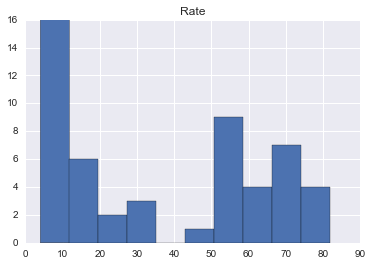

In [18]:
pandas_data.hist('Rate')

#### 14. Plot the Math distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1196b4410>]], dtype=object)

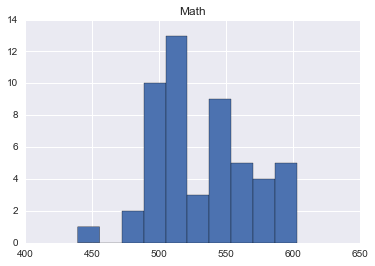

In [19]:
pandas_data.hist('Math')

#### 15. Plot the Verbal distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119785410>]], dtype=object)

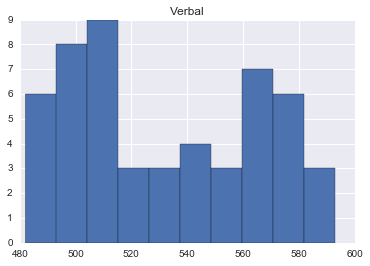

In [20]:
pandas_data.hist('Verbal')

#### 16. What is the typical assumption for data distribution?

The typical assumptions for a data distribution is that the data can be represented by a single statistical distribution, is continuous, and is a normal distribution. 

#### 17. Does that distribution hold true for our data?

No, the data is not normally distributed. From the scatterplots below, there is a negative correlation. As the participation rate goes up, there is a decrease in scores in both the Verbal and Math section. This could suggest that the high scores in low participation states are artificially inflated.


One thing to note is that there is an outlier in the Math section. Although the participation rate is low (which should translate to a higher score), the Math score for that state is low as well. 

#### 18. Plot some scatterplots. **BONUS**: Use a PyPlot `figure` to present multiple plots at once.

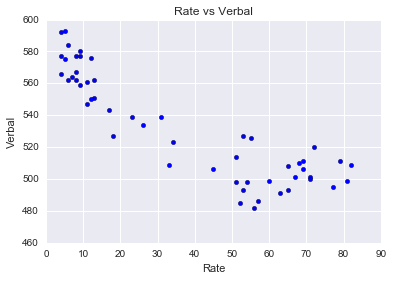

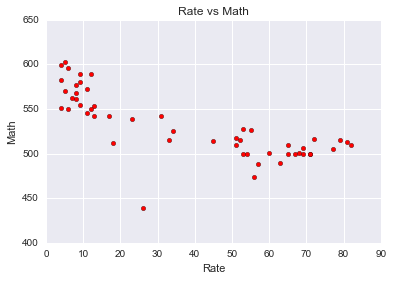

In [21]:
pandas_data.plot(kind='scatter', x='Rate', y='Verbal', c='blue', title='Rate vs Verbal')
pandas_data.plot(kind='scatter', x='Rate', y='Math', c='red', title = 'Rate vs Math')

#### 19. Are there any interesting relationships to note?

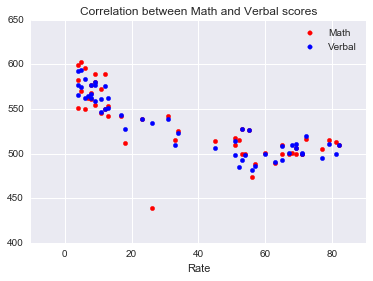

In [22]:
plt.scatter(pandas_data['Rate'],pandas_data['Math'], color = 'r', label='Math')
plt.scatter(pandas_data['Rate'],pandas_data['Verbal'], color = 'b', label='Verbal')
plt.xlabel('Rate')
plt.title('Correlation between Math and Verbal scores')
plt.grid(True)

plt.legend(loc='upper right')
plt.show()

#### 20. Create box plots for each variable. 

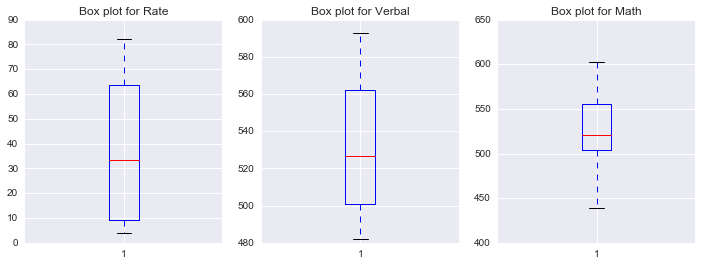

In [23]:
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(131)
plt.boxplot(pandas_data['Rate'])
ax1.set_title('Box plot for Rate')

ax2 = fig.add_subplot(132)
plt.boxplot(pandas_data['Verbal'])
ax2.set_title('Box plot for Verbal')

ax3 = fig.add_subplot(133)
plt.boxplot(pandas_data['Math'])
ax3.set_title('Box plot for Math')
plt.show()

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

#### SAT Participation Rate by State

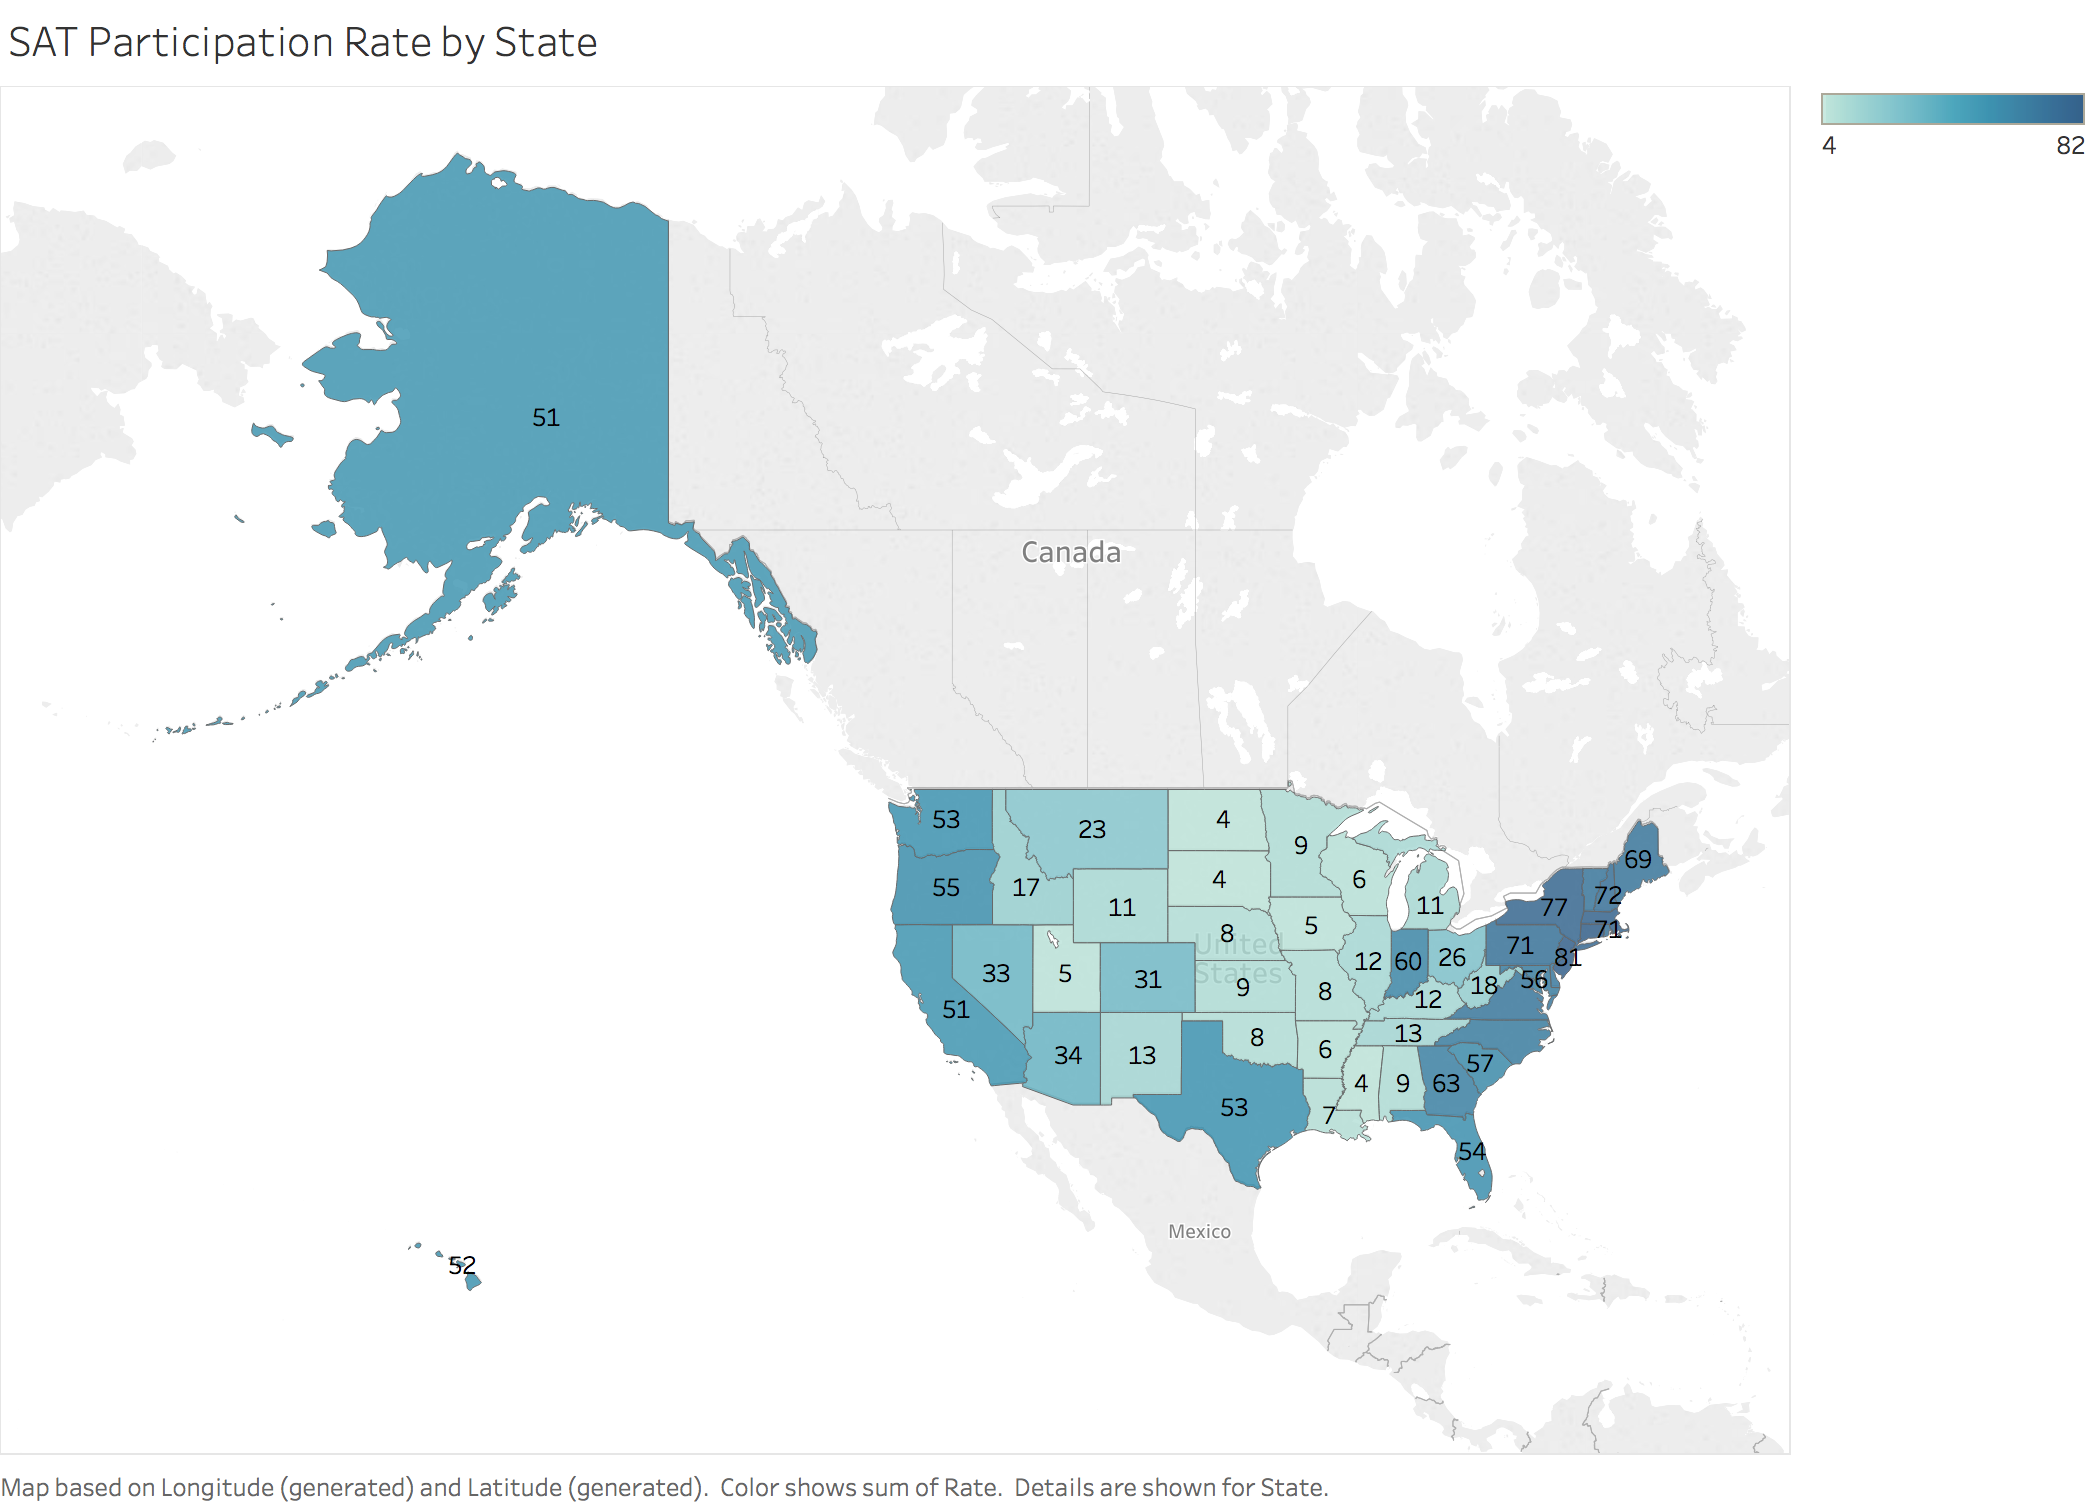

In [24]:
from IPython.display import Image
Image(filename='assets/SAT Participation Rate by State.png') 

#### SAT Math Section Scores by State

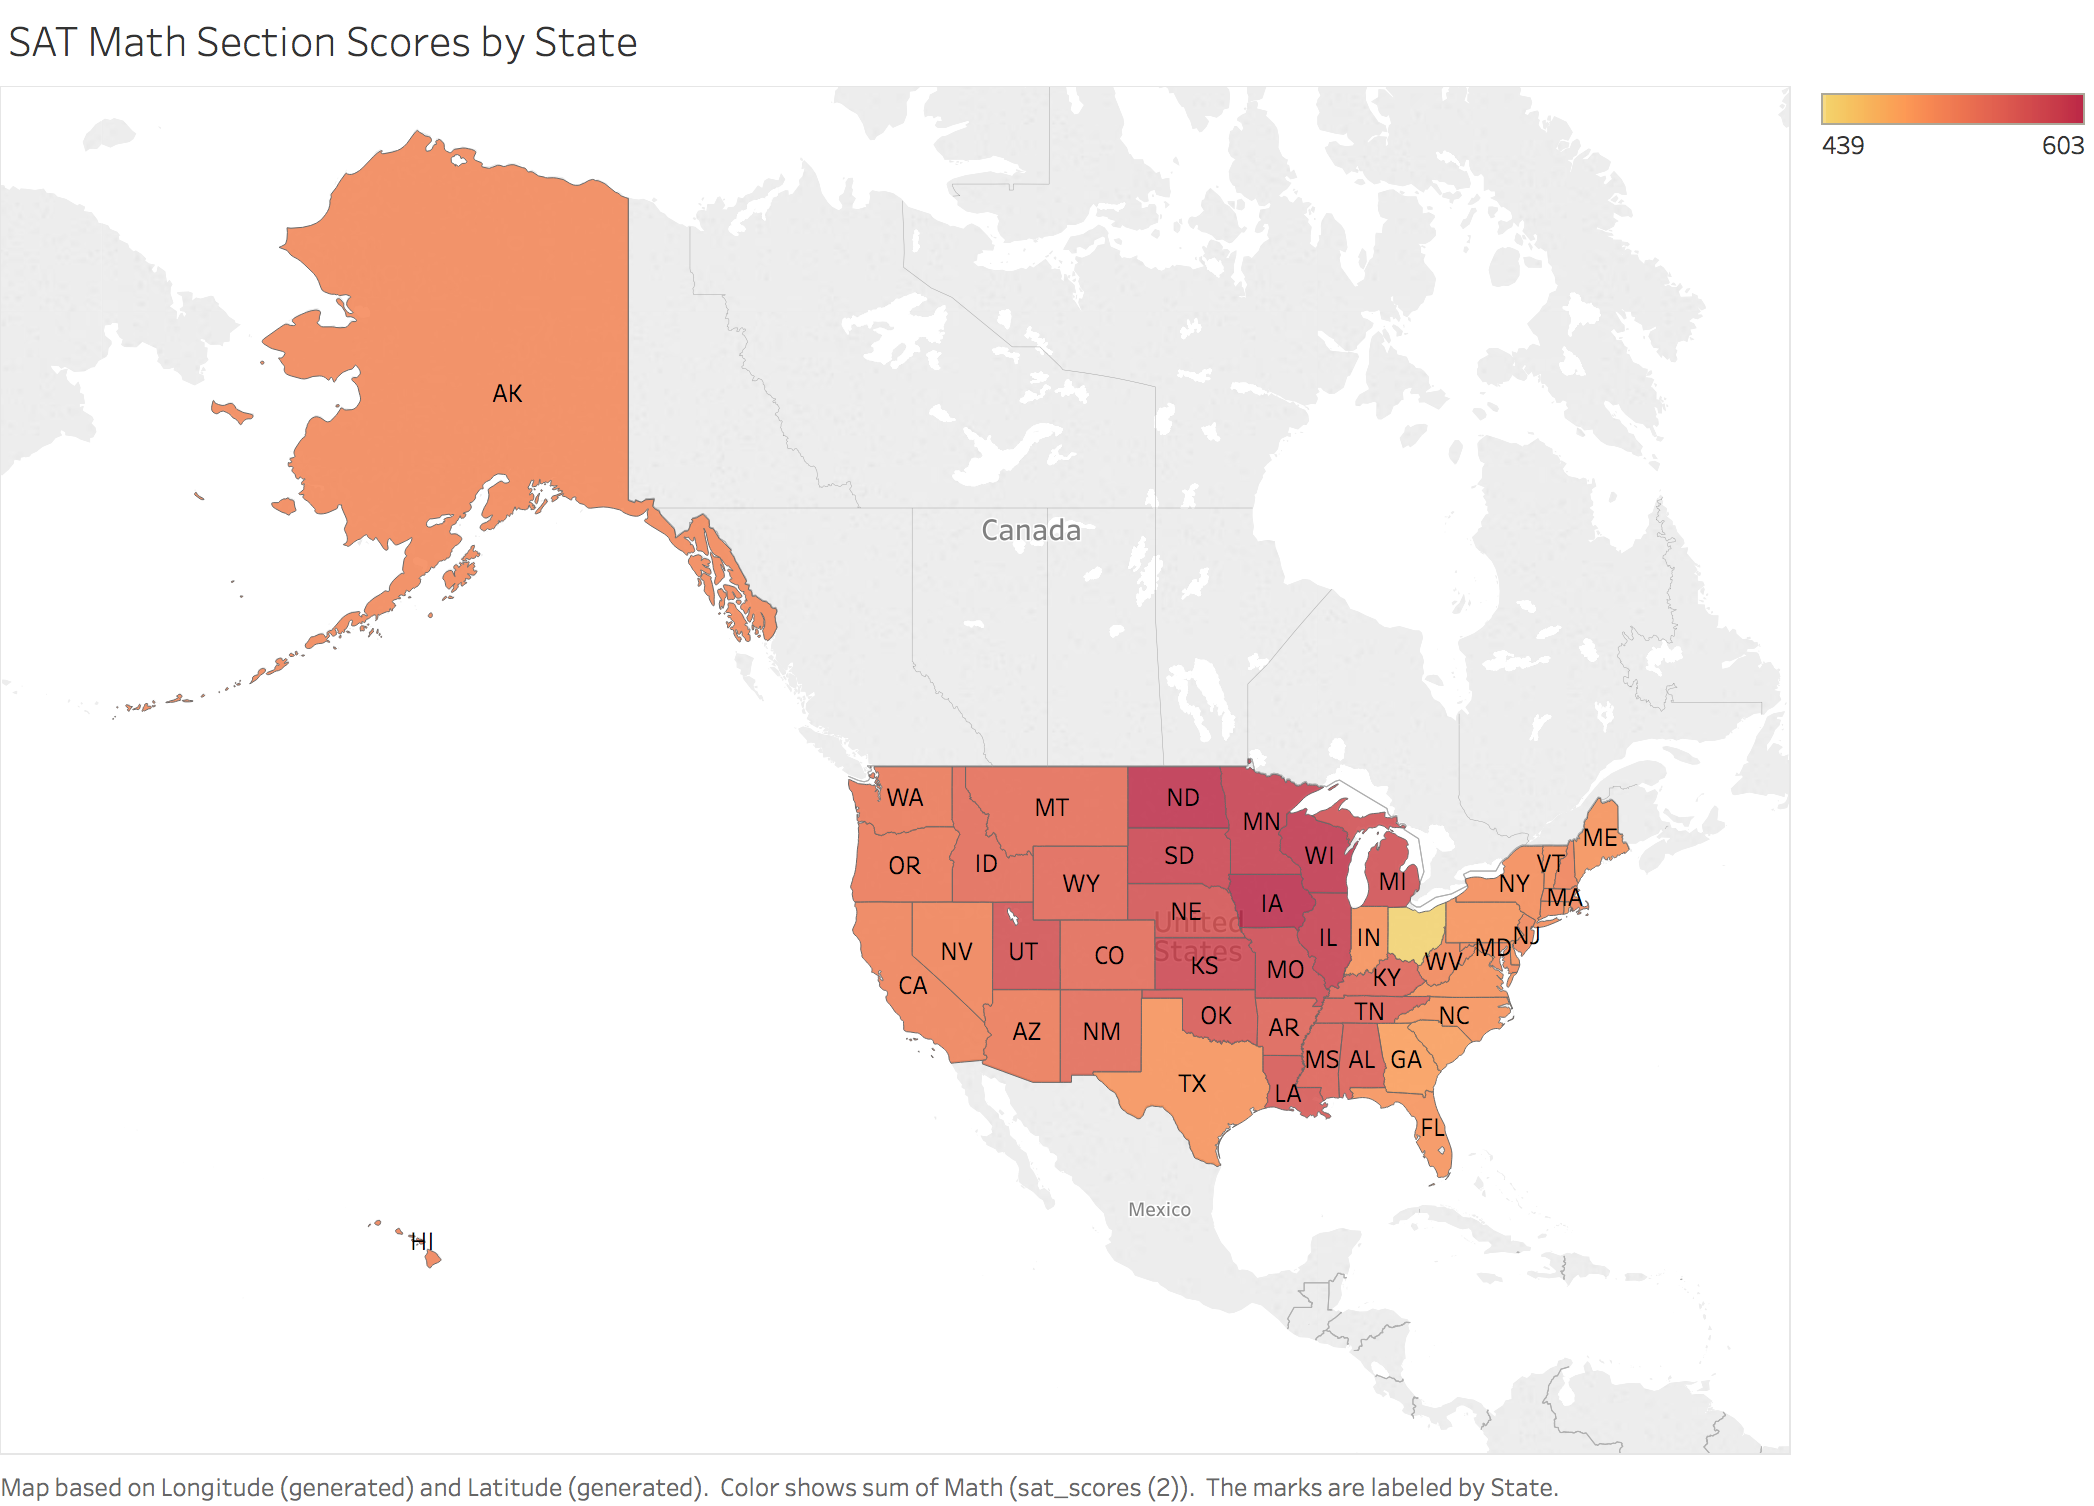

In [25]:
from IPython.display import Image
Image(filename='assets/SAT Math Scores by State.png') 

#### SAT Verbal Section Scores by State

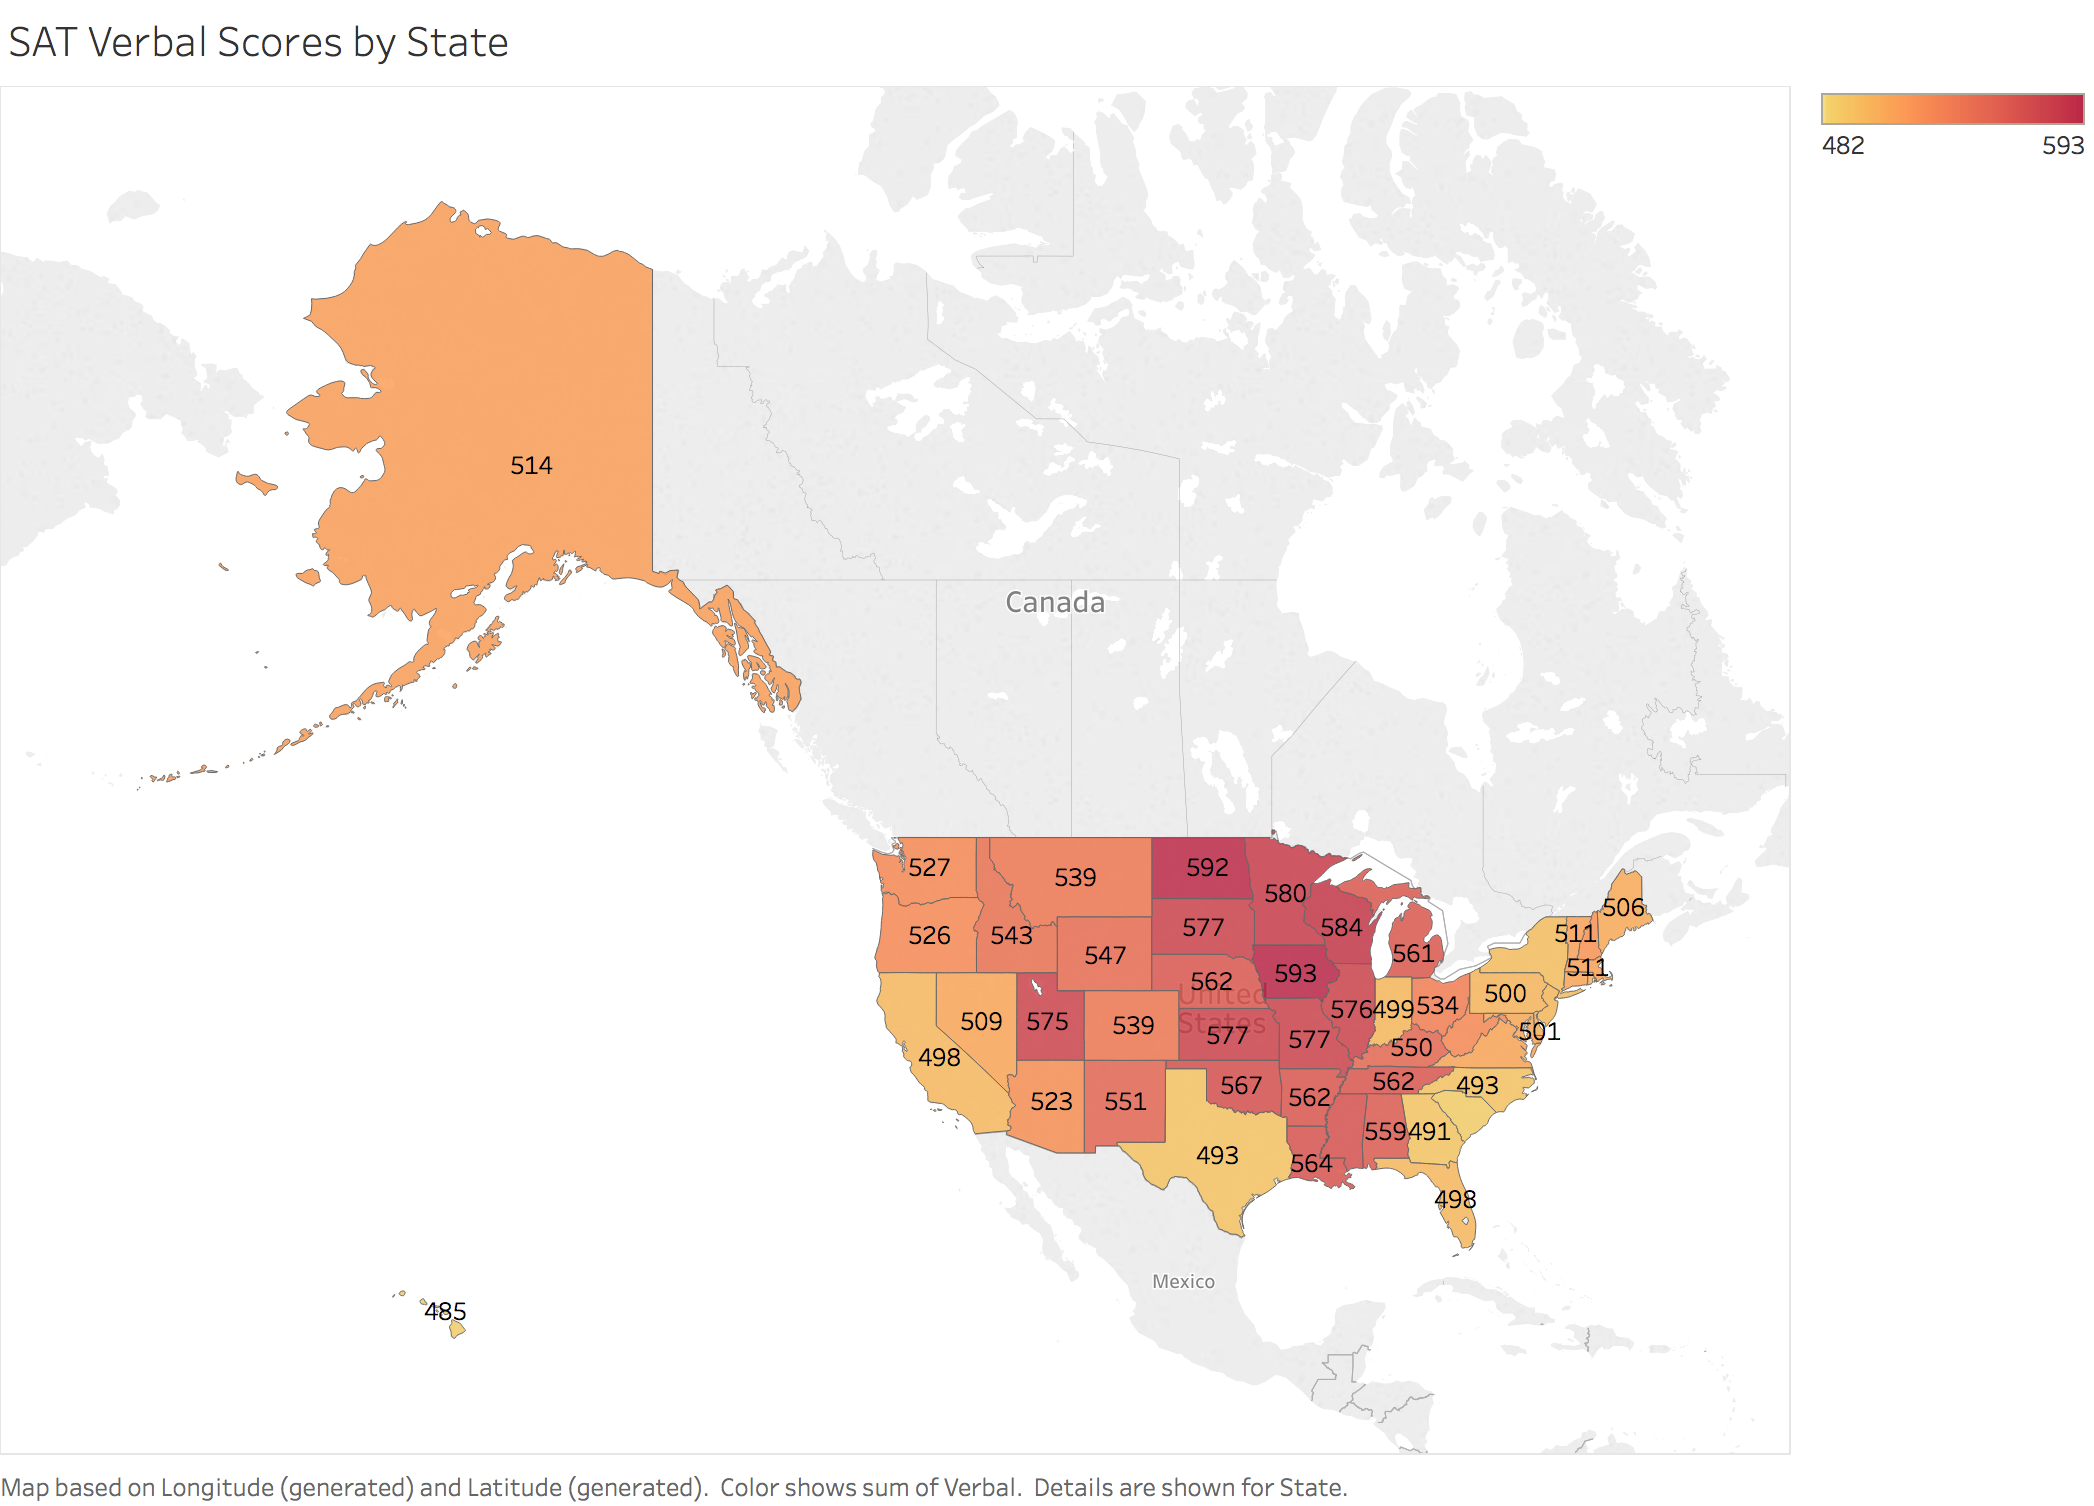

In [26]:
from IPython.display import Image
Image(filename='assets/SAT Verbal Scores by State.png') 